In [ ]:
#librairies to use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#loading datasets for the training and testing
fifa_training = pd.read_csv('/content/male_players (legacy).csv', na_values="-")
fifa_training.head()

<ipython-input-26-f2badcb42d27>:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_training = pd.read_csv('/content/male_players (legacy).csv', na_values="-")


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [ ]:
fifa_testing = pd.read_csv('/content/players_22-1.csv', na_values="-")
fifa_testing.head()

<ipython-input-27-99db3ae25980>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_testing = pd.read_csv('/content/players_22-1.csv', na_values="-")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [ ]:
#looking for missing datasets
fifa_training.isnull().sum()

player_id           0
player_url          0
fifa_version        0
fifa_update         0
fifa_update_date    0
                   ..
cb                  1
rcb                 1
rb                  1
gk                  1
player_face_url     1
Length: 110, dtype: int64

In [ ]:
fifa_testing.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [ ]:
numeric_data = fifa_training.select_dtypes(include=[np.number])
categorical_data = fifa_training.select_dtypes(include=["object"])

In [ ]:
fifa_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54147 entries, 0 to 54146
Columns: 110 entries, player_id to player_face_url
dtypes: float64(51), int64(12), object(47)
memory usage: 45.4+ MB


In [ ]:
fifa_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [ ]:
fifa_testing.shape

(19239, 110)

In [ ]:
fifa_training.shape

(54147, 110)

In [ ]:
fifa_testing.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [ ]:
fifa_training.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,54147.000000,54147.000000,54147.0,54147.000000,54147.000000,5.316700e+04,53404.000000,54147.000000,54147.000000,54147.000000,...,21285.000000,54146.000000,54146.000000,54146.000000,54146.000000,54146.000000,54146.000000,54146.000000,54146.000000,5955.000000
mean,195637.811088,16.162964,2.0,65.839659,70.335346,2.078136e+06,15053.947270,25.071380,181.122020,75.459213,...,58.153347,44.921213,47.943301,46.054833,16.540612,16.221549,16.068260,16.252983,16.650371,42.895718
std,37279.105884,0.933559,0.0,7.521616,6.632864,4.872389e+06,26093.780173,4.632629,6.653745,6.920843,...,14.038727,20.887499,21.315827,20.978706,17.817906,16.798840,16.348561,16.997994,18.161092,9.136650
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.000000,16.000000,155.000000,49.000000,...,11.000000,3.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,183821.500000,15.000000,2.0,61.000000,66.000000,2.300000e+05,2000.000000,21.000000,176.000000,70.000000,...,49.000000,25.000000,26.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,38.000000
50%,204434.000000,16.000000,2.0,66.000000,70.000000,5.750000e+05,5000.000000,25.000000,181.000000,75.000000,...,60.000000,48.000000,53.000000,51.000000,11.000000,11.000000,11.000000,11.000000,11.000000,44.000000
75%,220663.000000,17.000000,2.0,71.000000,75.000000,1.700000e+06,15000.000000,28.000000,186.000000,80.000000,...,69.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,48.000000
max,254664.000000,18.000000,2.0,94.000000,95.000000,1.230000e+08,575000.000000,46.000000,208.000000,110.000000,...,96.000000,92.000000,94.000000,95.000000,91.000000,91.000000,95.000000,91.000000,90.000000,68.000000


In [ ]:
# dropping the rows in 'overall' column
fifa_training.dropna(subset=['overall'], inplace=True)

In [ ]:
# important features for analysis
important_features = ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
                      'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle',
                      'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
                      'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

In [ ]:
#regrouping the dataset with important features
fifa_training = fifa_training[important_features]
fifa_testing = fifa_testing[important_features]

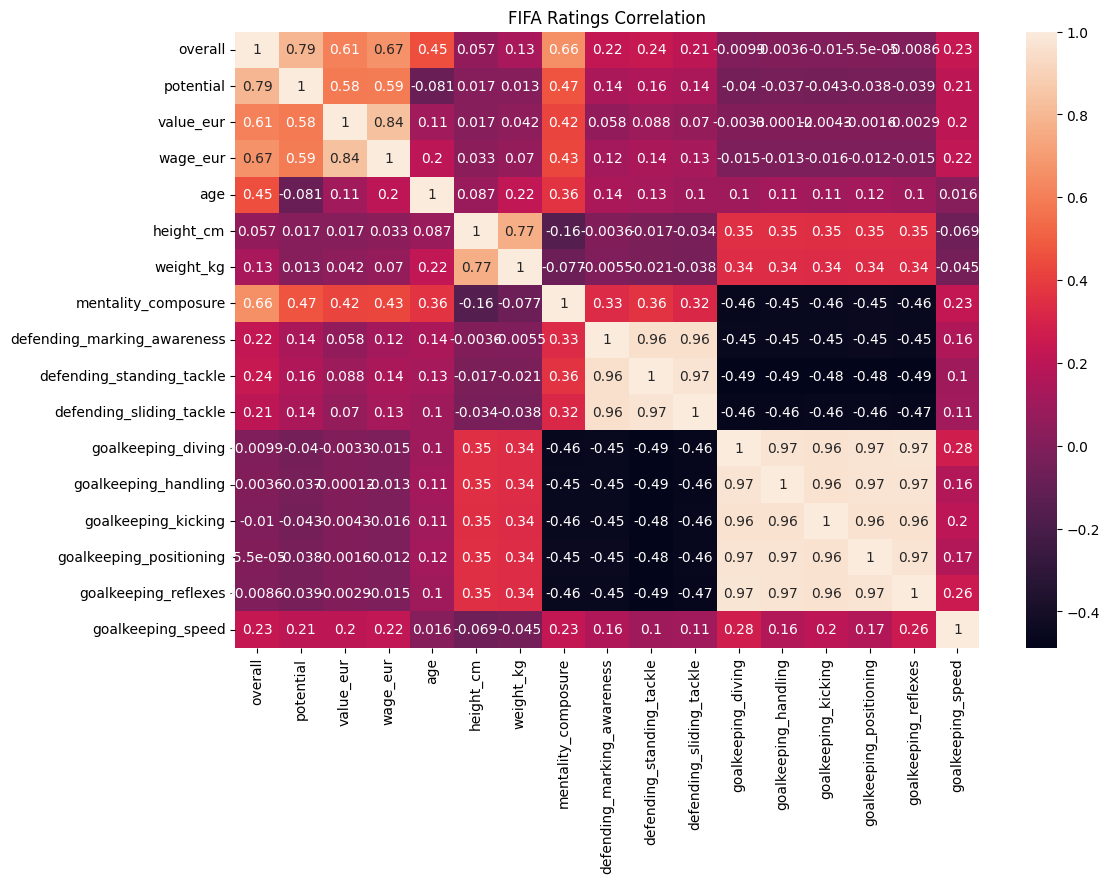

In [ ]:
# the correction of the dataset and the graphical representation
fifa_training_corr = fifa_training.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(fifa_training_corr, annot=True)
plt.title('FIFA Ratings Correlation')
plt.show()

In [ ]:
#imputing missing values for both training and testing data
imputer = SimpleImputer(strategy='mean')
X = fifa_training.drop(columns=['overall'])
y = fifa_training['overall']

In [ ]:
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

In [ ]:
X_test = fifa_testing.drop(columns=['overall'])
X_test_imputed = imputer.transform(X_test)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)
y_test = fifa_testing['overall']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# initializing machine learning models I will be using for regression
training_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNeighbors': KNeighborsRegressor(),
    'Support Vector Machine': SVR()
}

In [ ]:
# training and testing the models using k-fold cross-validation
results = {}
for name, model in training_models.items():
    cross_validation = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    results[name] = cross_validation.mean()
    print(f'{name}: Mean R2 Score = {results[name]}')

Linear Regression: Mean R2 Score = 0.8997183829848456
Random Forest: Mean R2 Score = 0.9919016943971775
Gradient Boosting: Mean R2 Score = 0.9820506411745097
KNeighbors: Mean R2 Score = 0.9519062926235348
Support Vector Machine: Mean R2 Score = 0.8378845376654998


In [ ]:
#trraining and evaluating the models
for name, model in training_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f'{name} Root Mean Squared Error: {rmse}')

Linear Regression Root Mean Squared Error: 2.2409172996825784
Random Forest Root Mean Squared Error: 0.6508409680432228
Gradient Boosting Root Mean Squared Error: 0.9777160731529541
KNeighbors Root Mean Squared Error: 1.557091239359795
Support Vector Machine Root Mean Squared Error: 2.841543440189777


In [ ]:
#selecting the best model based on cross-validation results
model_name = max(results, key=results.get)
best_model = training_models[model_name]

print(f'Best Model: {model_name}')

Best Model: Random Forest


In [ ]:
#hyperparameter tuning for the best model to use
if model_name in ['Random Forest', 'Gradient Boosting', 'KNeighbors']:
    hyperparameter_grid = {}
    grid_search = GridSearchCV(best_model, hyperparameter_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    print(f'Best Model with Grid Search: {best_model}')

Best Model with Grid Search: RandomForestRegressor(random_state=42)


In [ ]:
#testing the best model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_r2 = r2_score(y_test, y_pred)

print(f'The Root Mean Squared Error: {test_rmse}')
print(f'R2 Score: {test_r2}')

The Root Mean Squared Error: 0.6508409680432228
R2 Score: 0.9917063342201828


In [ ]:
!pip install streamlit
import streamlit as st
st.title('Rating Prediction')
st.sidebar.header('Input')

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [ ]:
User_inputs = {}
for feature in important_features[1:]:
    User_inputs[feature] = st.sidebar.number_input(f'Enter {feature}', value=float(X[feature].mean()))

In [ ]:
# Prediction function
def rating_pred(User_inputs):
    input_data = pd.DataFrame([User_inputs])
    input_imputed = imputer.transform(input_data)
    prediction = best_model.predict(input_imputed)
    return prediction[0]

In [ ]:
# Prediction and display
if st.sidebar.button('Predict the Rating'):
    prediction = rating_pred(User_inputs)
    st.write(f'Predicted Rating: {prediction:.2f}')

In [ ]:
#testint the test data
y_test_pred = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Root Mean Squared Error: {test_rmse}')
print(f'R2 Score: {test_r2}')